In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [57]:
df=pd.read_csv("DS1_C5_S1_Descriptive_Analysis_Concept_Salary.csv")

In [58]:
df

,Intel,Microsoft,Adobe
0,125,159,142
1,144,188,106
2,115,125,130
3,137,164,119
4,128,97,82
5,121,221,122
6,126,244,135
7,118,268,82
8,116,149,101
9,112,203,131


In [193]:
df.mode().loc[0]

Intel        112
Microsoft    203
Adobe         82
Name: 0, dtype: int64

In [196]:
df.mode().values[0]

array([112, 203,  82], dtype=int64)

In [59]:
df.shape

(25, 3)

In [60]:
df.describe()

,Intel,Microsoft,Adobe
count,25.00000,25.00000,25.000000
mean,122.92000,171.80000,114.200000
std,16.87187,49.90324,19.276497
min,89.00000,97.00000,76.000000
25%,114.00000,138.00000,101.000000
50%,121.00000,159.00000,119.000000
75%,130.00000,200.00000,129.000000
max,180.00000,300.00000,146.000000


In [61]:
ct=pd.DataFrame()
ct["Measures"]=["mean","median","mode"]

In [62]:
#to convert columns to index
ct.set_index('Measures',inplace=True)

In [63]:
i1,m1,a1=df.mean()
i2,m2,a2=df.median()
i3,m3,a3=df.mode().values[0]

In [64]:
ct["Intel"]=[i1,i2,i3]
ct["Microsoft"]=[m1,m2,m3]
ct["Adobe"]=[a1,a2,a3]

In [65]:
ct

,Intel,Microsoft,Adobe
Measures,,,
mean,122.92,171.8,114.2
median,121.00,159.0,119.0
mode,112.00,203.0,82.0


In [66]:
type(df.mean())

pandas.core.series.Series

In [91]:
ct1=pd.DataFrame()
ct1["Measures"]=["mean","SD","CV in %"]
ct1.set_index('Measures',inplace=True)

In [93]:
i1,m1,a1=df.mean()

In [94]:
i2=df["Intel"].std()
m2=df["Microsoft"].std()
a2=df["Adobe"].std()

In [95]:
i3=i2/i1*100
m3=m2/m1*100
a3=a2/a1*100

In [96]:
ct1["Intel"]=[i1,i2,i3]
ct1["Microsoft"]=[m1,m2,m3]
ct1["Adobe"]=[a1,a2,a3]
ct1

,Intel,Microsoft,Adobe
Measures,,,
mean,122.920000,171.800000,114.200000
SD,16.871870,49.903240,19.276497
CV in %,13.725895,29.047287,16.879594


In [108]:
i1,m1,a1=df.describe().values[1]
i2,m2,a2=df.describe().values[2]
i3,m3,a3=i2/i1*100,m2/m1*100,a2/a1*100

In [109]:
ct1["Intel"]=[i1,i2,i3]
ct1["Microsoft"]=[m1,m2,m3]
ct1["Adobe"]=[a1,a2,a3]
ct1

,Intel,Microsoft,Adobe
Measures,,,
mean,122.920000,171.800000,114.200000
SD,16.871870,49.903240,19.276497
CV in %,13.725895,29.047287,16.879594


In [110]:
from scipy.stats import variation

In [112]:
variation(df)*100

array([13.44857556, 28.46041299, 16.53855743])

In [113]:
ct2=pd.DataFrame()
ct2["Measures"]=["min","max","range","q1","q3","iqr","lf","uf","outliers"]
ct2.set_index('Measures',inplace=True)

In [114]:
ct2

""
Measures
min
max
range
q1
q3
iqr
lf
uf
outliers


In [122]:
i1,m1,a1=df.describe().values[3]
i2,m2,a2=df.describe().values[7]
i3,m3,a3=i2-i1,m2-m1,a2-a1
i4,m4,a4=df.describe().values[4]#q1
i5,m5,a5=df.describe().values[6]#q3
i6,m6,a6=i5-i4,m5-m4,a5-a4#iqr
i7,m7,a7=i4-(1.5*i6),m4-(1.5*m6),a4-(1.5*a6)#lf
i8,m8,a8=i5+(1.5*i6),m5+(1.5*m6),a5+(1.5*a6)#uf
i9,m9,a9=0,0,0

In [141]:
df.describe()

,Intel,Microsoft,Adobe
count,25.00000,25.00000,25.000000
mean,122.92000,171.80000,114.200000
std,16.87187,49.90324,19.276497
min,89.00000,97.00000,76.000000
25%,114.00000,138.00000,101.000000
50%,121.00000,159.00000,119.000000
75%,130.00000,200.00000,129.000000
max,180.00000,300.00000,146.000000


In [136]:
i9=df[(df["Intel"]<i7)|((df["Intel"]>i8))]["Intel"].values

In [137]:
m9=df[(df["Microsoft"]<m7)|((df["Microsoft"]>m8))]["Microsoft"].values

In [138]:
a9=df[(df["Adobe"]<a7)|((df["Adobe"]>a8))]["Adobe"].values

In [139]:
ct2["Intel"]=[i1,i2,i3,i4,i5,i6,i7,i8,i9]
ct2["Microsoft"]=[m1,m2,m3,m4,m5,m6,m7,m8,m9]
ct2["Adobe"]=[a1,a2,a3,a4,a5,a6,a7,a8,a9]

In [140]:
ct2

,Intel,Microsoft,Adobe
Measures,,,
min,89.0,97.0,76.0
max,180.0,300.0,146.0
range,91.0,203.0,70.0
q1,114.0,138.0,101.0
q3,130.0,200.0,129.0
iqr,16.0,62.0,28.0
lf,90.0,45.0,59.0
uf,154.0,293.0,171.0
outliers,"[180, 89]",[300],[]


In [144]:
df.quantile(0.75)#q3

Intel        130.0
Microsoft    200.0
Adobe        129.0
Name: 0.75, dtype: float64

In [197]:
df.quantile(0.25)#q1

Intel        114.0
Microsoft    138.0
Adobe        101.0
Name: 0.25, dtype: float64

In [145]:
df.min()

Intel        89
Microsoft    97
Adobe        76
dtype: int64

In [201]:
df1=pd.read_csv("DS1_C5_S1_Descriptive_Analysis_Concept_mtcars.csv")
df1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [204]:
#correalation
corr1=df1["mpg"].corr(df1["cyl"]).round(2)
corr1

-0.85

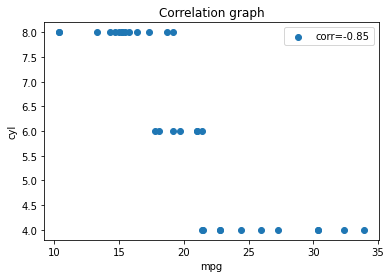

In [209]:
plt.scatter(df1["mpg"],df1["cyl"],label="corr="+str(corr1))
plt.title("Correlation graph")
plt.xlabel("mpg")
plt.ylabel("cyl")
plt.legend()
plt.show()

In [212]:
corr2=df1["mpg"].corr(df1["disp"]).round(2)
corr2

-0.85

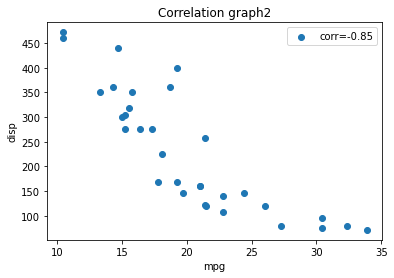

In [217]:
plt.scatter(df1["mpg"],df1["disp"],label="corr="+str(corr2))
plt.title("Correlation graph2")
plt.xlabel("mpg")
plt.ylabel("disp")
plt.legend()
plt.show()

In [214]:
corr3=df1["mpg"].corr(df1["drat"]).round(2)
corr3

0.68

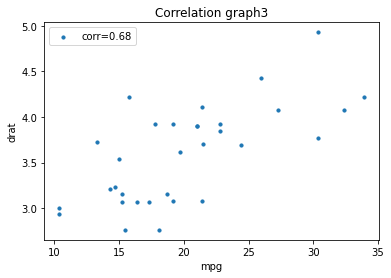

In [218]:
plt.scatter(df1["mpg"],df1["drat"],s=10,label="corr="+str(corr3))
plt.title("Correlation graph3")
plt.xlabel("mpg")
plt.ylabel("drat")
plt.legend()
plt.show()

### Skewness

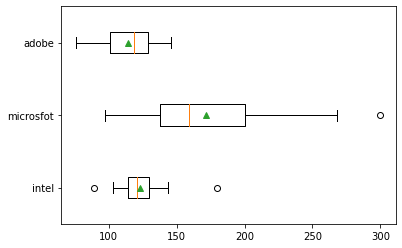

In [227]:
plt.boxplot(df,vert=0,showmeans=True)
plt.yticks([1,2,3],["intel","microsfot","adobe"])
plt.show()

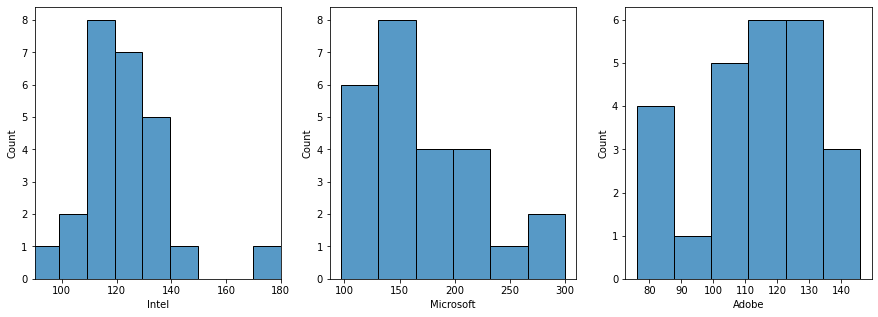

In [244]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.xlim([90,180])
sb.histplot(df["Intel"])#seaborn
plt.subplot(132)
sb.histplot(df["Microsoft"])
plt.subplot(133)
sb.histplot(data=df["Adobe"])
plt.show()

<AxesSubplot:>

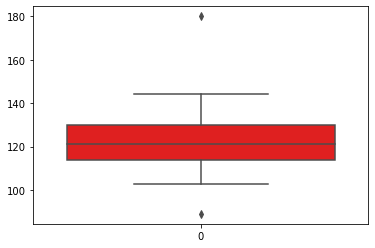

In [242]:
sb.boxplot(data=df["Intel"],color='Red')

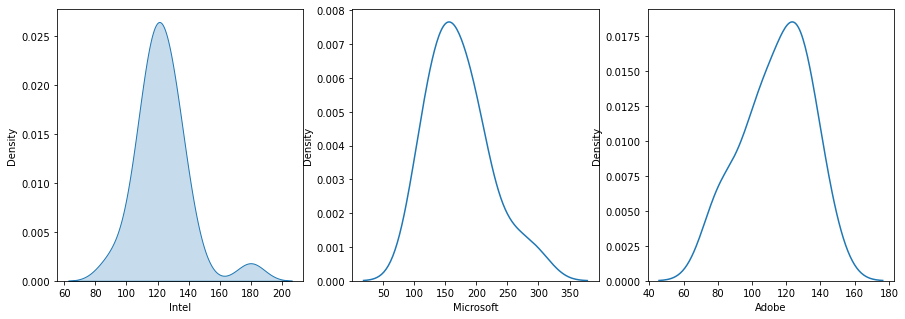

In [248]:
#kde-kernel density estimations
plt.figure(figsize=(15,5))

plt.subplot(131)
sb.kdeplot(df["Intel"],shade="True")#seaborn

plt.subplot(132)
sb.kdeplot(df["Microsoft"])

plt.subplot(133)
sb.kdeplot(data=df["Adobe"])

plt.show()

In [252]:
from scipy.stats import skew
#skewness >1 or <-1 are highly skewed
#skewness=3*(mean-median)/SD
skew(df["Intel"]),skew(df["Microsoft"]),skew(df["Adobe"])

(1.2651085361799728, 0.7985372804626888, -0.39654570498212544)

In [253]:
#Kurtosis:pearson formula
#kurtosis is -3 to 3 :normal
#leptokurtic has positive kurtosis
#platykurtic has negative kurtosis
#Kurtosis describes the amount of peakedness of a distribution. Distributions that are high
#and thin are referred to as leptokurtic distributions. Distributions that are flat and spread
#out are referred to as platykurtic distributions. Between these two types are distributions
#that are more “normal” in shape, referred to as mesokurtic distributions. 

In [256]:
from scipy.stats import kurtosis
kurtosis(df,fisher=False)

array([6.72835001, 3.26771568, 2.24975955])

In [ ]:
sb.